Klasifikasi Gambar
----------------------------

#### Mengunduh CIFAR10



In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Unduh cifar10 dataset yang berisi 60000 (50000 train, 10000 test) gambar kecil beserta labelnya, lalu gunakan transformasi data untuk merubah ke bentuk tensor minibatch yang masing-masing berisi 8 gambar
Output dari torchvision dataset adalah PILImage antara [0, 1].
Transformasi menjadi tensor dengan rentang antara [-1, 1].



<div class="alert alert-info"><h4>Catatan</h4><p> Jika menggunakan windows dan mengeluarkan BrokenPipeError, coba atur num_worker dari torch.utils.data.DataLoader() menjadi 0.</p></div>



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Cek beberapa gambar

torch.Size([8, 3, 32, 32])
tensor([[[[ 0.3490,  0.7255,  0.7569,  ..., -0.0667, -0.0980, -0.1137],
          [ 0.3647,  0.8039,  0.8353,  ..., -0.1451, -0.2863, -0.2235],
          [ 0.3725,  0.8039,  0.8353,  ..., -0.2314, -0.4824, -0.3255],
          ...,
          [ 0.6078,  0.5294,  0.4588,  ...,  0.2392,  0.2392,  0.2314],
          [ 0.3804,  0.3490,  0.3569,  ...,  0.2235,  0.2235,  0.2863],
          [ 0.2235,  0.1922,  0.2314,  ...,  0.5451,  0.5059,  0.5765]],

         [[-0.1216,  0.1686,  0.1451,  ..., -0.7412, -0.7020, -0.7098],
          [-0.1059,  0.1373,  0.1137,  ..., -0.7255, -0.6863, -0.6549],
          [-0.0275,  0.1529,  0.1059,  ..., -0.7176, -0.7647, -0.7020],
          ...,
          [-0.0431,  0.0118,  0.0196,  ..., -0.2314, -0.2000, -0.2078],
          [-0.2471, -0.1608, -0.0824,  ..., -0.3412, -0.3098, -0.2471],
          [-0.3647, -0.2941, -0.2078,  ..., -0.1608, -0.1765, -0.1059]],

         [[-0.3412, -0.1216, -0.1765,  ..., -0.7098, -0.6941, -0.7176],
   

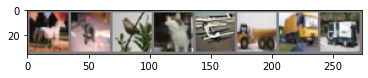

horse cat   bird  cat   plane truck truck truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Soal

Buat 3 linear layer untuk meneruskan convolutional layer berikut (kali ini inputnya memiliki 3-channel). Buatlah MLP dengan input dari output konvolusi, dengan lapisan berisi, 120 neuron, 84 neuron, 10 neuron



In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class CovNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #
        #

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #
        #
        #
        return x


covnet = CovNet()

### Optimisasi
Gunakan cross-entropy dan SGD dengan momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(covnet.parameters(), lr=0.001, momentum=0.9)

### Soal

Ambil data dari iterator dalam bentuk MiniBatch, masukan menjadi input, dan optimisasi sebanyak 5 epoch. 
Tampilkan nilai dari akumulasi loss untuk memastikan optimisasi berjalan dengan baik. Lalu plot nilai loss dan hitung total waktu yang dibutuhkan.



In [ ]:
import time
start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        
        # zero the parameter gradients
        
        # forward + backward + optimize
        
        # print statistics
        
    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))



Simpan model yang sudah dilatih



In [ ]:
torch.save(covnet.state_dict(), 'cifar_covnet.pth')

### Tes

Setelah melatih beberapa epoch pada training dataset, cek apakah model sudah mempelajari sesuatu.
Kita akan cek dengan memprediksi output dan membandingkan dengan labelnya. Jika prediksi benar, kita tambah sampel pada daftar prediksi benar.




In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

Load model yang telah disimpan


In [ ]:
covnet = CovNet()
covnet.load_state_dict(torch.load('cifar_covnet.pth'))

Coba model pada contoh berikut



In [ ]:
outputs = covnet(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Prediksi: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

Cek performa pada seluruh test dataset

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = covnet(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'akurasi pada tes: {100 * correct // total} %')

Manakah kelas dengan performa baik dan tidak baik?


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = covnet(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'akurasi untuk label: {classname:5s} adalah {accuracy:.1f} %')

Menggunakan GPU
----------------

cek apakah perangkat cuda sudah tersedia?

baik data maupun model harus di kirim ke perangkat cuda terlebih dahulu

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

### Soal

Coba gunakan model berikut pada GPU dan bandingkan latensinya dengan CPU



In [ ]:
import time

covnet = CovNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(covnet.parameters(), lr=0.001, momentum=0.9)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        
        # zero the parameter gradients
        
        # forward + backward + optimize
        
        # print statistics
        
    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

### Soal

Bandingkan optimisasi SGD, AdaGrad, RMSProp, dan Adam

Untuk dokumentasi bisa dilihat disini https://pytorch.org/docs/stable/optim.html 


### SGD

### AdaGrad

### RMSprop

### Adam

Hitung kembali akurasi

In [ ]:
correct = 0
total = 0
covnet.to('cpu')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = covnet(images)
        _, predictions = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()

        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

print(f'akurasi pada seluruh data tes: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'akurasi untuk label: {classname:5s} adalah {accuracy:.1f} %')

Komputasi GPU Parallel
-------------------------

Lakukan perhitungan parallel dengan menggunakan optimisasi adam dan hitung latensinya

In [ ]:
print(torch.cuda.device_count(), "GPU tersedia")
covnet = CovNet().to(device)
covnet_parallel = nn.DataParallel(covnet)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(covnet_parallel.parameters(), lr=0.001)

